<a href="https://colab.research.google.com/github/Prisci723/InteligenciaArtificial1/blob/main/Regularizacion/Lab4_Regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [430]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [431]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

# Regularización de regresión multivariable

El 80% de los datos de X serán utilizados para el entrenamiento que son 13900. El resto para la prueba

In [432]:
data = np.loadtxt('/content/gdrive/MyDrive/Machine learning/Datasets/bicicletas_hora.txt', delimiter=',')
X_multivariable = data[:13900, :6]
y_multivariable = data[:13900, 6]

X_test_multivariable = data[13900:, :6]
Y_test_multivariable = data[13900:, 6]

m = y_multivariable.size

In [433]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [434]:
X_norm, mu, sigma = featureNormalize(X_multivariable.copy())

print(X_multivariable.copy())
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.400e-01 2.879e-01 8.100e-01 0.000e+00 3.000e+00 1.300e+01]
 [2.200e-01 2.727e-01 8.000e-01 0.000e+00 8.000e+00 3.200e+01]
 [2.200e-01 2.727e-01 8.000e-01 0.000e+00 5.000e+00 2.700e+01]
 ...
 [7.000e-01 6.667e-01 7.900e-01 1.940e-01 3.000e+00 1.760e+02]
 [7.000e-01 6.667e-01 7.400e-01 1.343e-01 2.100e+01 4.810e+02]
 [7.000e-01 6.515e-01 7.000e-01 1.642e-01 4.100e+01 6.640e+02]]
Media calculada: [  0.49911942   0.47797011   0.62297914   0.19411271  34.02971223
 140.59021583]
Desviación estandar calculada: [1.97700089e-01 1.76596944e-01 1.98204773e-01 1.23026769e-01
 4.73403236e+01 1.37516817e+02]
[[-1.31066923e+00 -1.07629330e+00  9.43573965e-01 -1.57780875e+00
  -6.55460501e-01 -9.27815366e-01]
 [-1.41183257e+00 -1.16236501e+00  8.93121093e-01 -1.57780875e+00
  -5.49842296e-01 -7.89650446e-01]
 [-1.41183257e+00 -1.16236501e+00  8.93121093e-01 -1.57780875e+00
  -6.13213219e-01 -8.26009635e-01]
 ...
 [ 1.01608743e+00  1.06870418e+00  8.42668221e-01 -9.16160209e-04
  -6.55460501e-01  2

In [435]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [436]:
print(X)

[[ 1.00000000e+00 -1.31066923e+00 -1.07629330e+00 ... -1.57780875e+00
  -6.55460501e-01 -9.27815366e-01]
 [ 1.00000000e+00 -1.41183257e+00 -1.16236501e+00 ... -1.57780875e+00
  -5.49842296e-01 -7.89650446e-01]
 [ 1.00000000e+00 -1.41183257e+00 -1.16236501e+00 ... -1.57780875e+00
  -6.13213219e-01 -8.26009635e-01]
 ...
 [ 1.00000000e+00  1.01608743e+00  1.06870418e+00 ... -9.16160209e-04
  -6.55460501e-01  2.57494210e-01]
 [ 1.00000000e+00  1.01608743e+00  1.06870418e+00 ... -4.86176406e-01
  -2.75234963e-01  2.47540477e+00]
 [ 1.00000000e+00  1.01608743e+00  9.82632476e-01 ... -2.43139867e-01
   1.47237856e-01  3.80615110e+00]]


In [437]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [438]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [439]:
alpha = 0.003
num_iters = 10000
theta_m = np.zeros(7)
theta_m, J_history = gradientDescentMulti(X, y_multivariable , theta_m, alpha, num_iters)

Text(0, 0.5, 'Costo J')

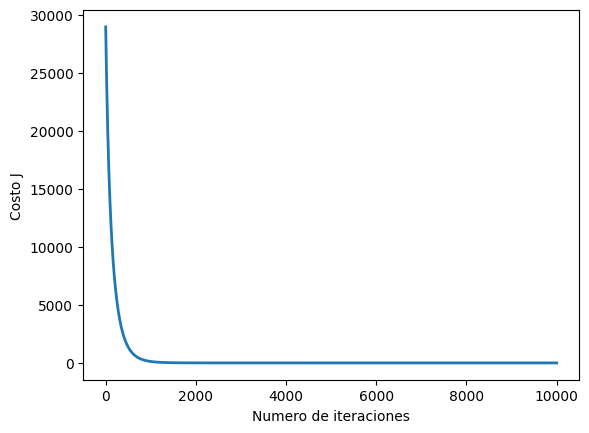

In [440]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [441]:
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_m)))

theta calculado por el descenso por el gradiente: [ 1.74619928e+02 -1.78307582e-01  1.78616511e-01 -1.43430677e-03
  6.30868590e-03  4.73405552e+01  1.37516159e+02]


In [442]:
X_test_norm = X_test_multivariable.copy()
m, n = X_test_norm.shape
print(X_test_norm)

[[7.000e-01 6.667e-01 7.400e-01 1.343e-01 4.400e+01 2.830e+02]
 [7.400e-01 6.970e-01 7.000e-01 1.343e-01 8.900e+01 1.610e+02]
 [7.600e-01 7.273e-01 6.600e-01 8.960e-02 8.400e+01 1.300e+02]
 ...
 [2.600e-01 2.576e-01 6.000e-01 1.642e-01 7.000e+00 8.300e+01]
 [2.600e-01 2.727e-01 5.600e-01 1.343e-01 1.300e+01 4.800e+01]
 [2.600e-01 2.727e-01 6.500e-01 1.343e-01 1.200e+01 3.700e+01]]


In [443]:
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
print(X_test_norm)

[[1.000e+00 7.000e-01 6.667e-01 ... 1.343e-01 4.400e+01 2.830e+02]
 [1.000e+00 7.400e-01 6.970e-01 ... 1.343e-01 8.900e+01 1.610e+02]
 [1.000e+00 7.600e-01 7.273e-01 ... 8.960e-02 8.400e+01 1.300e+02]
 ...
 [1.000e+00 2.600e-01 2.576e-01 ... 1.642e-01 7.000e+00 8.300e+01]
 [1.000e+00 2.600e-01 2.727e-01 ... 1.343e-01 1.300e+01 4.800e+01]
 [1.000e+00 2.600e-01 2.727e-01 ... 1.343e-01 1.200e+01 3.700e+01]]


In [444]:
X_test_norm[:, 1:7] = (X_test_norm[:, 1:7] - mu) / sigma

print(X_test_norm)

[[ 1.          1.01608743  1.06870418 ... -0.48617641  0.21060878
   1.03558086]
 [ 1.          1.2184141   1.24028133 ... -0.48617641  1.16117262
   0.14841664]
 [ 1.          1.31957743  1.41185848 ... -0.84951197  1.05555442
  -0.07701033]
 ...
 [ 1.         -1.2095059  -1.24787045 ... -0.24313987 -0.57096594
  -0.41878671]
 [ 1.         -1.2095059  -1.16236501 ... -0.48617641 -0.44422409
  -0.67330104]
 [ 1.         -1.2095059  -1.16236501 ... -0.48617641 -0.46534773
  -0.75329126]]


In [445]:
pred = np.dot(X_test_norm, theta_m)
pred_int = pred.astype(int)

print(pred_int)
print(Y_test_multivariable)

print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred_int == Y_test_multivariable) * 100))

[327 250 214 ...  89  61  49]
[327. 250. 214. ...  90.  61.  49.]
Precision del conjuto de entrenamiento: 50.85%


In [446]:
def computeCostMultiReg(X, y, theta, lambda_):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_/(2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [447]:
def gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_):

    m = y.shape[0]

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        theta[1:] = theta[1:] - (alpha / m) * lambda_ * theta[1:]
        J_history.append(computeCostMultiReg(X, y, theta, lambda_))

    return theta, J_history

In [448]:
alpha = 0.003
num_iters = 10000
theta_mr = np.zeros(7)
lambda_ = 0.01
theta_mr, J_history = gradientDescentMultiReg(X, y_multivariable , theta_mr, alpha, num_iters, lambda_)

Text(0, 0.5, 'Costo J')

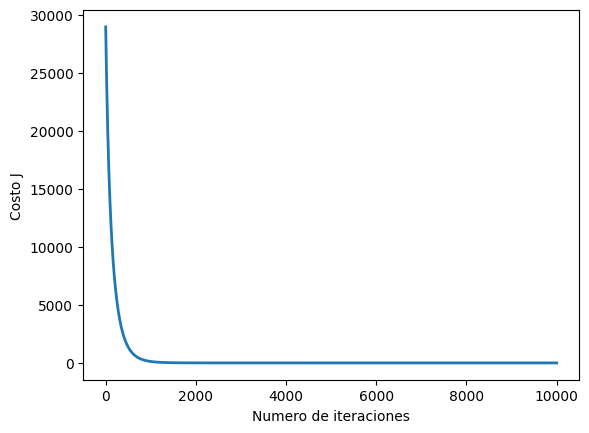

In [449]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [450]:
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_mr)))

theta calculado por el descenso por el gradiente: [ 1.74619928e+02 -1.78285783e-01  1.78638271e-01 -1.46593239e-03
  6.31319698e-03  4.73405537e+01  1.37516036e+02]


In [451]:
pred = np.dot(X_test_norm, theta_mr)
pred_int = pred.astype(int)

print(pred_int)
print(Y_test_multivariable)

print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred_int == Y_test_multivariable) * 100))

[327 250 214 ...  89  61  49]
[327. 250. 214. ...  90.  61.  49.]
Precision del conjuto de entrenamiento: 50.59%


# Regularización de regresión logística

En la siguiente regresión se procederá a entrenarlo con el 80% de los datos ya tratados y realizar la prueba con el restante, para dicho cálculo el siguiente dataset cuenta con 61069 datos, por lo que el 80% 48855 aprox serán destinados al entrenamiento, mientras que el resto servirá para probar el entrenamiento.

In [452]:
data = np.loadtxt('/content/gdrive/MyDrive/Machine learning/Datasets/secondary_mushroom_dataset.csv', delimiter=',')
y = data[:, 1]  # Primera columna
X = data[:, 2:]  # Resto de las columnas
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, y_train = X[:48856], y[:48856]
X_test, y_test = X[48855:], y[48855:]
print(X_train)
print(y_train)

[[15.26        6.          2.         ...  2.65643689  0.
   3.        ]
 [16.6         6.          2.         ...  2.65643689  0.
   2.        ]
 [14.07        6.          2.         ...  2.65643689  0.
   3.        ]
 ...
 [10.76        6.          8.         ...  2.65643689  0.
   0.        ]
 [11.92        6.          3.         ...  2.65643689  0.
   0.        ]
 [12.09        6.          3.         ...  2.65643689  0.
   0.        ]]
[0. 0. 0. ... 1. 1. 1.]


In [453]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [454]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    print(sigma)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [455]:
X_norm, muL, sigmaL = featureNormalize(X_train.copy())

[3.87458785 2.25000176 2.86241283 3.14919065 0.36832549 2.15511231
 0.34647004 2.8817067  3.34727885 8.66856754 0.72034998 1.06142352
 3.09135228 0.44256951 1.5921718  0.62983399 1.33373797 1.10763492]


In [456]:
m, n = X_norm.shape
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [457]:
print(X_norm.shape)

(48856, 19)


In [458]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [459]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.30488825  0.44381461  0.17058885 -0.0276759  -0.03679536 -0.08296848
 -0.03182567  0.15193869 -0.09436562  0.10809181  0.18049692 -0.43458504
  0.14986533  0.14402729 -0.29357591 -0.17511852  0.15083152  0.2812886
  0.21956319]


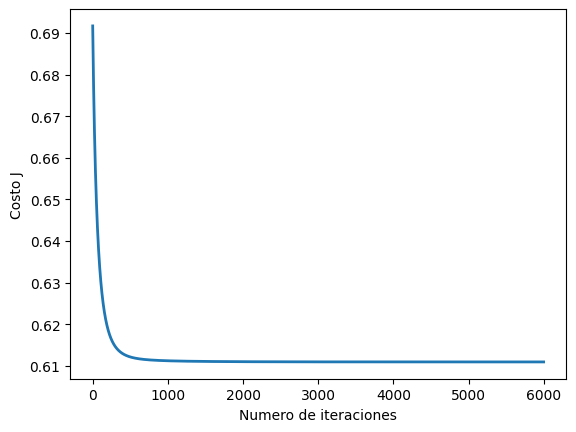

In [460]:
alpha = 0.03
num_iters = 6000
theta_l = np.zeros(19)
theta_l, J_history = descensoGradiente(theta_l, X_norm , y_train,  alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_l)))

In [461]:
X_test_log = X_test.copy()
m, n = X_test_log.shape
print(X_test_log)

[[12.09        6.          3.         ...  2.65643689  0.
   0.        ]
 [12.91        6.          8.         ...  2.65643689  0.
   2.        ]
 [12.63        6.          8.         ...  2.65643689  0.
   2.        ]
 ...
 [ 1.27        5.          7.         ...  2.65643689  0.
   2.        ]
 [ 1.24        2.          7.         ...  2.65643689  0.
   2.        ]
 [ 1.17        5.          7.         ...  2.65643689  0.
   2.        ]]


In [462]:
X_test_log = np.concatenate([np.ones((m, 1)), X_test_log], axis=1)
print(X_test_log.shape)
print(X_test_log)

(12214, 19)
[[ 1.         12.09        6.         ...  2.65643689  0.
   0.        ]
 [ 1.         12.91        6.         ...  2.65643689  0.
   2.        ]
 [ 1.         12.63        6.         ...  2.65643689  0.
   2.        ]
 ...
 [ 1.          1.27        5.         ...  2.65643689  0.
   2.        ]
 [ 1.          1.24        2.         ...  2.65643689  0.
   2.        ]
 [ 1.          1.17        5.         ...  2.65643689  0.
   2.        ]]


In [463]:
X_test_log[:, 1:19] = (X_test_log[:, 1:19] - muL) / sigmaL
print(X_test_log)

[[ 1.          1.52617314  0.9047352  ... -0.01914671 -0.53891047
  -0.94065167]
 [ 1.          1.73780855  0.9047352  ... -0.01914671 -0.53891047
   0.86499743]
 [ 1.          1.6655428   0.9047352  ... -0.01914671 -0.53891047
   0.86499743]
 ...
 [ 1.         -1.26638194  0.46029111 ... -0.01914671 -0.53891047
   0.86499743]
 [ 1.         -1.2741247  -0.87304118 ... -0.01914671 -0.53891047
   0.86499743]
 [ 1.         -1.29219114  0.46029111 ... -0.01914671 -0.53891047
   0.86499743]]


La siguiente función tiene como objetivo colocar la probabilidad obteneida por la sigmoide aplicada en la hipótesis en 1 si es mayor o igual 0.4 y 0 si es menor, se decidió estos rangos por conveniencia.

In [464]:
def predict(theta, X):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.4 else 0 for x in probabilities]

In [465]:
pred = predict(theta_l, X_test_log)

In [466]:
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test) * 100))

Precision del conjuto de entrenamiento: 59.61%


In [467]:
def calcularCostoRegularizado(theta, X, y,lambda_):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    temp = theta.copy()
    temp[0] = 0
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [468]:
def descensoGradienteRegularizado(X, y, theta, alpha, num_iters, lambda_):
    m = y.shape[0]
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        grad = calcularCostoRegularizado(theta, X, y, lambda_)[1]
        theta = theta - alpha * grad
        J_history[i] = calcularCostoRegularizado(theta, X, y, lambda_)[0]

    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.29231419  0.16995505  0.07805687  0.00967552 -0.02843174 -0.03132273
  0.0082131   0.07613049 -0.00169968  0.04042247  0.16073585 -0.17296272
  0.03971222  0.05885137 -0.08412672 -0.11458273  0.08659649  0.10874899
  0.11247145]


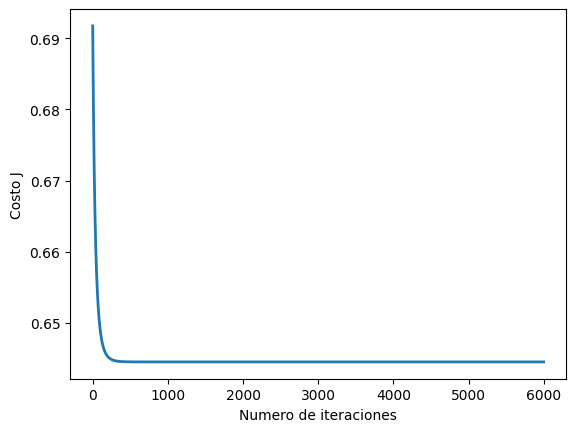

In [469]:
alpha = 0.03
num_iters = 6000
lambda_ = 10000
theta_lr = np.zeros(19)
theta_lr, J_history = descensoGradienteRegularizado( X_norm, y_train, theta_lr, alpha, num_iters, lambda_)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_lr)))

In [470]:
pred = predict(theta_lr, X_test_log)

In [471]:
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test) * 100))

Precision del conjuto de entrenamiento: 61.47%
